<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/FE_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install pandas numpy matplotlib seaborn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [3]:
def clean_data(df):
    # Drop irrelevant columns
    df = df.drop(columns=["PassengerId", "Ticket", "Cabin"], errors="ignore")

    # Handle missing values
    df = df.copy()
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

    # Filter out invalid values
    df = df[df["Fare"] >= 0]

    # Drop duplicates
    df = df.drop_duplicates()

    return df

In [4]:
def engineer_features(df):
    df = df.copy()

    # Extract title from name
    df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")
    df["Title"] = df["Title"].replace([
        "Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major",
        "Rev", "Sir", "Jonkheer", "Dona"
    ], "Rare")

    # Family size and alone flag
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    df["IsAlone"] = np.where(df["FamilySize"] == 1, 1, 0)

    # Binning fare and age
    df["FareBin"] = pd.qcut(df["Fare"], 4, labels=False)
    df["AgeBin"] = pd.cut(df["Age"], bins=[0, 12, 20, 40, 60, 100], labels=False)

    # One-hot encoding
    df = pd.get_dummies(df, columns=["Sex", "Embarked", "Title"], drop_first=True)

    return df


In [5]:
df_clean = clean_data(df)
df_prepared = engineer_features(df_clean)

# Optional: Display result
print(df_prepared.head())

# Step 6: Save to CSV
df_prepared.to_csv("titanic_prepared.csv", index=False)

   Survived  Pclass                                               Name   Age  \
0         0       3                            Braund, Mr. Owen Harris  22.0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2         1       3                             Heikkinen, Miss. Laina  26.0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4         0       3                           Allen, Mr. William Henry  35.0   

   SibSp  Parch     Fare  FamilySize  IsAlone  FareBin  ...  Embarked_Q  \
0      1      0   7.2500           2        0        0  ...       False   
1      1      0  71.2833           2        0        3  ...       False   
2      0      0   7.9250           1        1        1  ...       False   
3      1      0  53.1000           2        0        3  ...       False   
4      0      0   8.0500           1        1        1  ...       False   

   Embarked_S  Title_Miss  Title_Mlle  Title_Mme  Title_Mr  Title_Mr

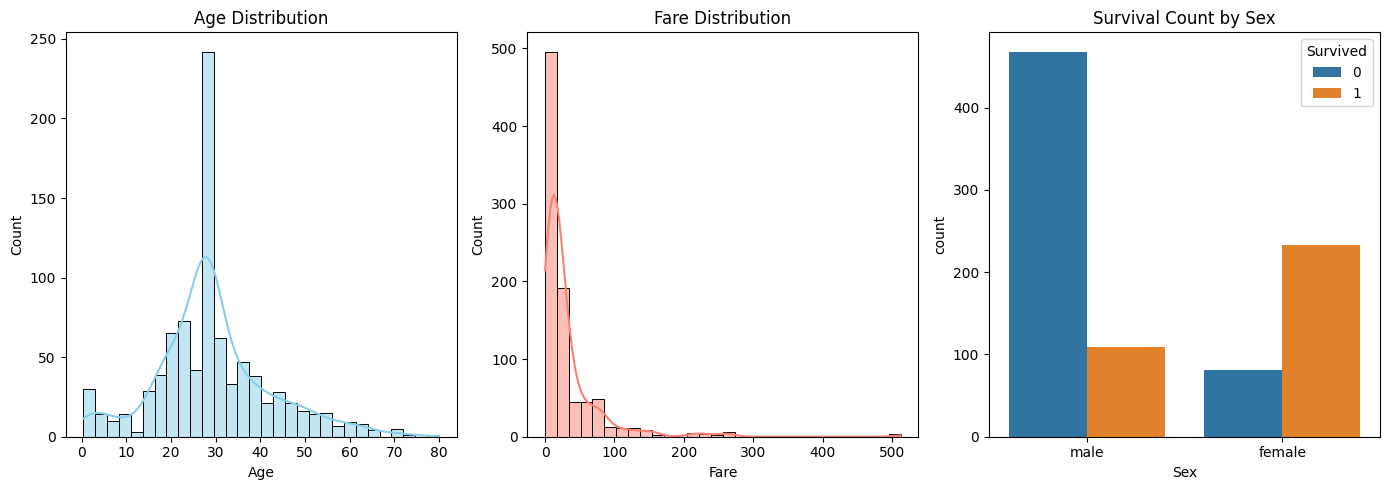

In [7]:
plt.figure(figsize=(14, 5))

# 1. Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(df_clean["Age"], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")

# 2. Fare Distribution
plt.subplot(1, 3, 2)
sns.histplot(df_clean["Fare"], bins=30, kde=True, color='salmon')
plt.title("Fare Distribution")

# 3. Survival by Sex
plt.subplot(1, 3, 3)
sns.countplot(data=df_clean, x="Sex", hue="Survived")
plt.title("Survival Count by Sex")

plt.tight_layout()
plt.show()